In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import median_absolute_error

In [133]:
train_data = pd.read_csv('train.csv')
train_data.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [134]:
train_data.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,3004.38646,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.50000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,5203.00000,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,7804.50000,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,10406.00000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


In [135]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB
None


In [136]:
# Check for missing data in train_data
missing_data = train_data.isnull().sum()

# Display columns with missing data and the corresponding count
print("Columns with missing data:")
print(missing_data[missing_data > 0])

Columns with missing data:
Series([], dtype: int64)


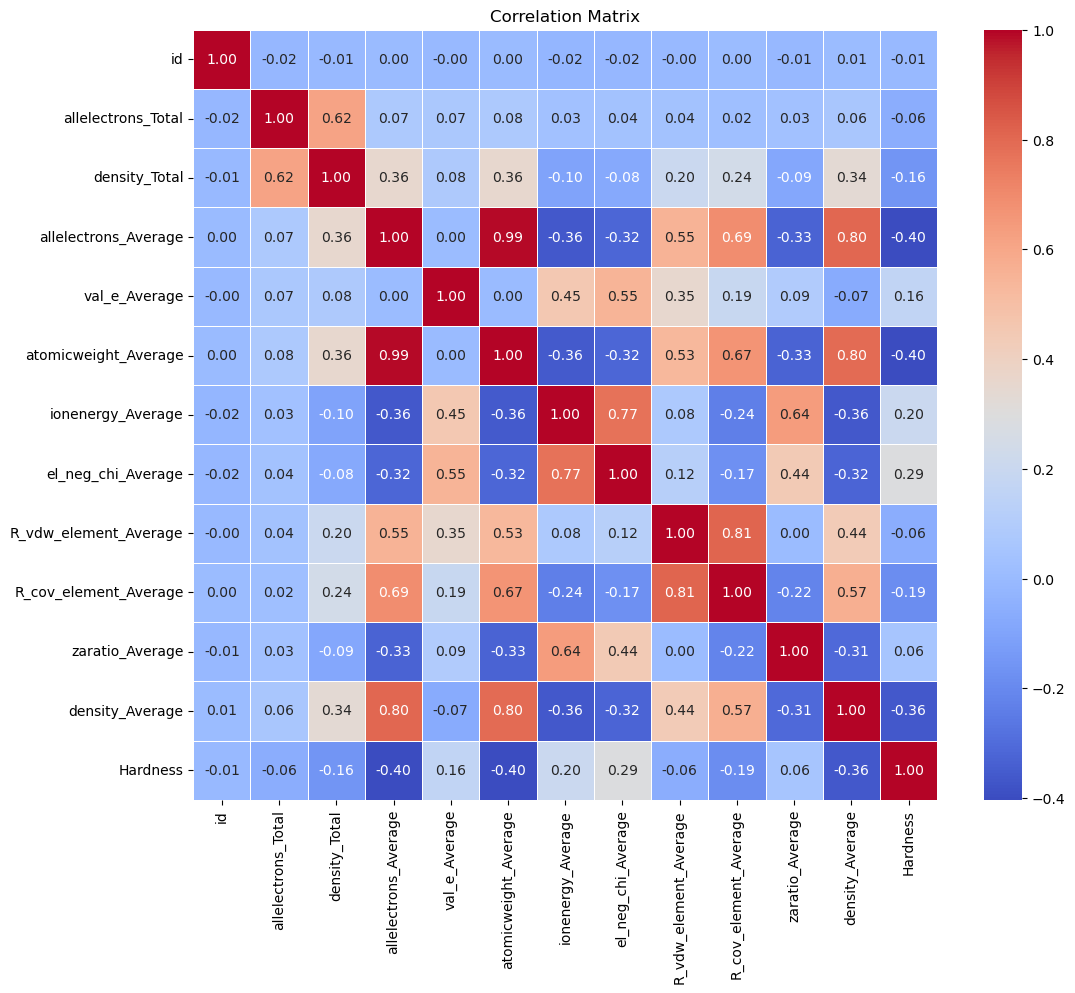

In [137]:
import seaborn as sns

# Calculate and visualize correlation matrix
correlation_matrix = train_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with column names on both axes
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

plt.title("Correlation Matrix")
plt.show()


As per above Correlation graph, highly correlated features are below:

allelectrons_Average & atomicweight_Average = 0.99

R_vdw_element_Average & R_cov_element_Average = 0.81

atomicweight_Average & density_Average = 0.8

allelectrons_Average & density_Average = 0.8

R_cov_element_Average & allelectrons_Average = 0.69

zaratio_Average & ionenergy_Average = 0.64

In [123]:
train_data.columns.tolist()

['id',
 'allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average',
 'Hardness']

In [138]:
# Example: Selecting features
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

In [139]:
# Create a dictionary to store MSE and R-squared values
model_performance = {}

In [77]:
# Splitting data into training and validation
X_train1, X_val1, y_train1, y_val1 = train_test_split(X, y, test_size=0.2, random_state=42)

#Choose a Regression Model
model = LinearRegression()

#Train the Model
model.fit(X_train1, y_train1)


#Evaluate the Model
predictions = model.predict(X_val1)


medae_simple = median_absolute_error(y_val1, predictions)

print(f'Median Absolute Error (Linear Regression): {medae_simple}')

Median Absolute Error (Linear Regression): 0.9747358132289365


In [78]:
model_performance['Linear Regression'] = {'MAE': medae_simple}

# Scaling features

In [140]:
# Splitting data into training and validation
X_train1, X_val1, y_train1, y_val1 = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the dataset

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and validation sets
X_train_scaled = scaler.fit_transform(X_train1)
X_val_scaled = scaler.transform(X_val1)

# # Exploring Feature importance

In [125]:
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are your training data
model = LinearRegression()
model.fit(X_train1, y_train1)

# Get coefficients and corresponding feature names
coefficients = model.coef_
feature_names = X_train1.columns

# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Print the significant features
print("Significant Features (Linear Regression):")
print(coefficients_df)


Significant Features (Linear Regression):
                  Feature   Coefficient
8   R_vdw_element_Average  1.938179e+00
7      el_neg_chi_Average  1.046292e+00
4           val_e_Average  4.129424e-02
2           density_Total  8.272628e-04
0                      id -6.176321e-07
1      allelectrons_Total -3.288013e-04
5    atomicweight_Average -9.333391e-03
3    allelectrons_Average -4.824714e-02
6       ionenergy_Average -8.283940e-02
11        density_Average -8.808963e-02
9   R_cov_element_Average -2.566296e-01
10        zaratio_Average -4.740406e+00


In [79]:

#Choose a Regression Model
model1 = LinearRegression()

#Train the Model
model1.fit(X_train_scaled, y_train1)


#Evaluate the Model
predictions1 = model1.predict(X_val_scaled)

medae_scale = median_absolute_error(y_val1, predictions1)
print(f'Median Squared Error: {medae_scale}')
model_performance['Scaled Linear Regression'] = {'MAE': medae_simple}

Median Squared Error: 0.9747358132289401


In [80]:
model_performance

{'Linear Regression': {'MAE': 0.9747358132289365},
 'Scaled Linear Regression': {'MAE': 0.9747358132289365}}

# # Scaling and Using LASSO

In [46]:
# Splitting data into training and validation
X_train1, X_val1, y_train1, y_val1 = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the dataset

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and validation sets
X_train_scaled = scaler.fit_transform(X_train1)
X_val_scaled = scaler.transform(X_val1)


In [119]:
X_train1.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
2124,2124,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.51006
394,394,64.0,13.385996,23.000000,4.000000,55.641640,9.013750,2.220000,1.908000,1.224000,0.474324,4.74000
3101,3101,97.0,13.477328,12.125000,4.375000,24.988133,11.037175,2.543750,1.720000,0.952500,0.486599,1.79976
1737,1737,151.0,22.980000,50.333333,4.333333,121.022733,8.531800,2.043333,2.076667,1.366667,0.416920,7.77500
561,561,131.0,24.150564,17.333333,4.666667,38.897020,10.459208,2.575833,1.753333,0.973333,0.473697,1.92652


In [81]:
#Lasso model implementation

from sklearn.linear_model import Lasso

# Example: Use Lasso regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)
#Evaluate the Model
predictions_lasso = lasso_model.predict(X_val_scaled)

#mse_scale_lasso = mean_squared_error(y_val1, predictions_lasso)
#r2_scale_lasso = r2_score(y_val1, predictions_lasso)

#print(f'Mean Squared Error: {mse_scale_lasso}')
#print(f'R-squared: {r2_scale_lasso}')

medae_scale_lasso = median_absolute_error(y_val1, predictions_lasso)
print(f'Median Squared Error: {medae_scale_lasso}')
model_performance['Lasso Regression'] = {'MAE': medae_scale_lasso}

Median Squared Error: 0.9756347785248325


In [82]:
model_performance

{'Linear Regression': {'MAE': 0.9747358132289365},
 'Scaled Linear Regression': {'MAE': 0.9747358132289365},
 'Lasso Regression': {'MAE': 0.9756347785248325}}

# # Using Random Forest with limited features

In [50]:
#X_train_scaled,X_val_scaled, y_train1, y_val1

from sklearn.ensemble import RandomForestRegressor

# Example: Use RandomForestRegressor for feature importance
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled,  y_train1)

# Display feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)

zaratio_Average          0.223424
ionenergy_Average        0.109359
allelectrons_Average     0.107458
R_cov_element_Average    0.086411
density_Average          0.071660
val_e_Average            0.064019
id                       0.061315
atomicweight_Average     0.059894
el_neg_chi_Average       0.059753
density_Total            0.059606
allelectrons_Total       0.050022
R_vdw_element_Average    0.047079
dtype: float64


In [86]:
# Convert top_features to a list
top_features = feature_importances.head(9).index.tolist()

# Select top N important features using NumPy array indexing
X_train_selected = X_train_scaled[:, [X_train.columns.get_loc(col) for col in top_features]]
X_val_selected = X_val_scaled[:, [X_val.columns.get_loc(col) for col in top_features]]

# Train a new model with selected features
new_model = RandomForestRegressor()
new_model.fit(X_train_selected, y_train1)

# Make predictions on the validation set
predictions_new_model = new_model.predict(X_val_selected)


medae_RandomForestLimitedFeatures_model = median_absolute_error(y_val1, predictions_new_model)
print(f'Median Squared Error: {medae_RandomForestLimitedFeatures_model}')
model_performance['Random Forest Limited Features'] = {'MAE': medae_RandomForestLimitedFeatures_model}

Median Squared Error: 0.6912499999999993


In [87]:
model_performance

{'Linear Regression': {'MAE': 0.9747358132289365},
 'Scaled Linear Regression': {'MAE': 0.9747358132289365},
 'Lasso Regression': {'MAE': 0.9756347785248325},
 'Random Forest Limited Features': {'MAE': 0.6912499999999993}}

# # Implementing Gradient Boosting

In [88]:
#X_train_scaled,X_val_scaled, y_train1, y_val1
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train1)

# Make predictions on the validation set
predictions_gb = gb_model.predict(X_val_scaled)

medae_gb = median_absolute_error(y_val1, predictions_gb)
print(f'Median Squared Error: {medae_gb}')
model_performance['Gradient Boosting'] = {'MAE': medae_gb}


Median Squared Error: 0.7057570282018306


In [89]:
model_performance

{'Linear Regression': {'MAE': 0.9747358132289365},
 'Scaled Linear Regression': {'MAE': 0.9747358132289365},
 'Lasso Regression': {'MAE': 0.9756347785248325},
 'Random Forest Limited Features': {'MAE': 0.6912499999999993},
 'Gradient Boosting': {'MAE': 0.7057570282018306}}

# # Implement XGBoost

In [90]:
#X_train_scaled,X_val_scaled, y_train1, y_val1
import xgboost as xgb

# Create and train the model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_scaled, y_train1)

# Make predictions on the validation set
predictions_xgb = xgb_model.predict(X_val_scaled)


medae_xgb = median_absolute_error(y_val1, predictions_xgb)
print(f'Median Squared Error: {medae_xgb}')
model_performance['XGBoost'] = {'MAE': medae_xgb}


Median Squared Error: 0.6810516119003296


In [92]:
model_performance

{'Linear Regression': {'MAE': 0.9747358132289365},
 'Scaled Linear Regression': {'MAE': 0.9747358132289365},
 'Lasso Regression': {'MAE': 0.9756347785248325},
 'Random Forest Limited Features': {'MAE': 0.6912499999999993},
 'Gradient Boosting': {'MAE': 0.7057570282018306},
 'XGBoost': {'MAE': 0.6810516119003296}}

In [93]:
# Sort the dictionary items based on MAE values
sorted_model_performance = sorted(model_performance.items(), key=lambda x: x[1]['MAE'])

# Display the sorted dictionary
for model, metrics in sorted_model_performance:
    print(f"{model}: {metrics}")

XGBoost: {'MAE': 0.6810516119003296}
Random Forest Limited Features: {'MAE': 0.6912499999999993}
Gradient Boosting: {'MAE': 0.7057570282018306}
Linear Regression: {'MAE': 0.9747358132289365}
Scaled Linear Regression: {'MAE': 0.9747358132289365}
Lasso Regression: {'MAE': 0.9756347785248325}


# # Tuning XGBoost Parameters

In [94]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create and train the model
xgb_model = xgb.XGBRegressor()

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_median_absolute_error', cv=3, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_scaled, y_train1)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the validation set using the best model
best_xgb_model = grid_search.best_estimator_
predictions_xgb_tuned = best_xgb_model.predict(X_val_scaled)

# Calculate Median Absolute Error
medae_xgb_tuned = median_absolute_error(y_val1, predictions_xgb_tuned)
print(f'Median Absolute Error (XGBoost Tuned): {medae_xgb_tuned}')

# Store performance in the model_performance dictionary
model_performance['XGBoost Tuned'] = {'MAE': medae_xgb_tuned}


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
Median Absolute Error (XGBoost Tuned): 0.6660252809524536


In [95]:
model_performance

{'Linear Regression': {'MAE': 0.9747358132289365},
 'Scaled Linear Regression': {'MAE': 0.9747358132289365},
 'Lasso Regression': {'MAE': 0.9756347785248325},
 'Random Forest Limited Features': {'MAE': 0.6912499999999993},
 'Gradient Boosting': {'MAE': 0.7057570282018306},
 'XGBoost': {'MAE': 0.6810516119003296},
 'XGBoost Tuned': {'MAE': 0.6660252809524536}}

In [96]:
# Sort the dictionary items based on MAE values
sorted_model_performance = sorted(model_performance.items(), key=lambda x: x[1]['MAE'])

# Display the sorted dictionary
for model, metrics in sorted_model_performance:
    print(f"{model}: {metrics}")

XGBoost Tuned: {'MAE': 0.6660252809524536}
XGBoost: {'MAE': 0.6810516119003296}
Random Forest Limited Features: {'MAE': 0.6912499999999993}
Gradient Boosting: {'MAE': 0.7057570282018306}
Linear Regression: {'MAE': 0.9747358132289365}
Scaled Linear Regression: {'MAE': 0.9747358132289365}
Lasso Regression: {'MAE': 0.9756347785248325}


# # ensemble of models (XGBoost and Gradient Boosting)

In [97]:
from sklearn.ensemble import VotingRegressor

# Create an ensemble of models (XGBoost and Gradient Boosting)
ensemble_model = VotingRegressor([
    ('xgb', xgb.XGBRegressor(**best_params)),
    ('gb', GradientBoostingRegressor(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'], 
                                     max_depth=best_params['max_depth'], min_samples_split=best_params['min_child_weight'], 
                                     subsample=best_params['subsample'], random_state=42))
])

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train1)

# Make predictions on the validation set
predictions_ensemble = ensemble_model.predict(X_val_scaled)

# Calculate Median Absolute Error for the ensemble
medae_ensemble = median_absolute_error(y_val1, predictions_ensemble)
print(f'Median Absolute Error (Ensemble): {medae_ensemble}')
model_performance['Ensemble'] = {'MAE': medae_ensemble}


Median Absolute Error (Ensemble): 0.6556386138852588


In [98]:
# Sort the dictionary items based on MAE values
sorted_model_performance = sorted(model_performance.items(), key=lambda x: x[1]['MAE'])

# Display the sorted dictionary
for model, metrics in sorted_model_performance:
    print(f"{model}: {metrics}")

Ensemble: {'MAE': 0.6556386138852588}
XGBoost Tuned: {'MAE': 0.6660252809524536}
XGBoost: {'MAE': 0.6810516119003296}
Random Forest Limited Features: {'MAE': 0.6912499999999993}
Gradient Boosting: {'MAE': 0.7057570282018306}
Linear Regression: {'MAE': 0.9747358132289365}
Scaled Linear Regression: {'MAE': 0.9747358132289365}
Lasso Regression: {'MAE': 0.9756347785248325}


# # Regularization

In [109]:
# Update best_params with regularization parameters
best_params['reg_alpha'] = 0.8  # Example value, you can tune this
best_params['reg_lambda'] = 0.1  # Example value, you can tune this

# Create and train the regularized XGBoost model
xgb_reg_model = xgb.XGBRegressor(**best_params)
xgb_reg_model.fit(X_train_scaled, y_train1)

# Make predictions on the validation set
predictions_xgb_reg = xgb_reg_model.predict(X_val_scaled)

# Calculate Median Absolute Error for the regularized XGBoost model
medae_xgb_reg = median_absolute_error(y_val1, predictions_xgb_reg)
print(f'Median Absolute Error (XGBoost Regularized): {medae_xgb_reg}')
model_performance['XGBoost Regularized'] = {'MAE': medae_xgb_reg}


Median Absolute Error (XGBoost Regularized): 0.6514518737792967


# # Cross-Validation

In [110]:
from sklearn.model_selection import cross_val_score

# Update best_params with regularization parameters
best_params['reg_alpha'] = 2  # Example value, you can tune this
best_params['reg_lambda'] = 0.1  # Example value, you can tune this

# Create and train the regularized XGBoost model
xgb_reg_model = xgb.XGBRegressor(**best_params)
xgb_reg_model.fit(X_train_scaled, y_train1)

# Perform cross-validation
cv_scores = cross_val_score(xgb_reg_model, X_train_scaled, y_train1, cv=5, scoring='neg_median_absolute_error')

# Calculate the median of cross-validation scores
cv_medae = -np.median(cv_scores)
print(f'Median Absolute Error (Cross-Validation): {cv_medae}')
model_performance['Cross-Validation'] = {'MAE': cv_medae}


Median Absolute Error (Cross-Validation): 0.6566271781921387


In [111]:
# Sort the dictionary items based on MAE values
sorted_model_performance = sorted(model_performance.items(), key=lambda x: x[1]['MAE'])

# Display the sorted dictionary
for model, metrics in sorted_model_performance:
    print(f"{model}: {metrics}")

XGBoost Regularized: {'MAE': 0.6514518737792967}
Ensemble: {'MAE': 0.6556386138852588}
Cross-Validation: {'MAE': 0.6566271781921387}
XGBoost Tuned: {'MAE': 0.6660252809524536}
XGBoost: {'MAE': 0.6810516119003296}
Random Forest Limited Features: {'MAE': 0.6912499999999993}
Gradient Boosting: {'MAE': 0.7057570282018306}
Linear Regression: {'MAE': 0.9747358132289365}
Scaled Linear Regression: {'MAE': 0.9747358132289365}
Lasso Regression: {'MAE': 0.9756347785248325}


# # XGBoost Tuned with Regularization

In [112]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'reg_alpha': [0.1, 0.01, 0.001,0.2,0.3,0.5,0.7,0.8,0.9,1.6,2,0.05,0.08,0.005],
    'reg_lambda': [0.1, 0.01, 0.001, 0.05, 0.005],
}

# Create and train the model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, min_child_weight=3, subsample=0.9, colsample_bytree=0.8, random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_median_absolute_error', cv=3, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_scaled, y_train1)

# Get the best parameters
best_reg_params = grid_search.best_params_
print("Best Regularization Parameters:", best_reg_params)

# Make predictions on the validation set using the best model
best_xgb_model_reg = grid_search.best_estimator_
predictions_xgb_reg_tuned = best_xgb_model_reg.predict(X_val_scaled)

# Calculate Median Absolute Error for the tuned XGBoost model with regularization
medae_xgb_reg_tuned = median_absolute_error(y_val1, predictions_xgb_reg_tuned)
print(f'Median Absolute Error (XGBoost Tuned with Regularization): {medae_xgb_reg_tuned}')


Best Regularization Parameters: {'reg_alpha': 2, 'reg_lambda': 0.05}
Median Absolute Error (XGBoost Tuned with Regularization): 0.6588684558868407


In [114]:
model_performance['XGBoost Tuned with Regularization'] = {'MAE': medae_xgb_reg_tuned}

In [115]:
# Sort the dictionary items based on MAE values
sorted_model_performance = sorted(model_performance.items(), key=lambda x: x[1]['MAE'])

# Display the sorted dictionary
for model, metrics in sorted_model_performance:
    print(f"{model}: {metrics}")

XGBoost Regularized: {'MAE': 0.6514518737792967}
Ensemble: {'MAE': 0.6556386138852588}
Cross-Validation: {'MAE': 0.6566271781921387}
XGBoost Tuned with Regularization: {'MAE': 0.6588684558868407}
XGBoost Tuned: {'MAE': 0.6660252809524536}
XGBoost: {'MAE': 0.6810516119003296}
Random Forest Limited Features: {'MAE': 0.6912499999999993}
Gradient Boosting: {'MAE': 0.7057570282018306}
Linear Regression: {'MAE': 0.9747358132289365}
Scaled Linear Regression: {'MAE': 0.9747358132289365}
Lasso Regression: {'MAE': 0.9756347785248325}


In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error

def train_and_evaluate_models(X_train, y_train, X_val, y_val):
    models = {
        'Linear Regression': LinearRegression(),
        'Lasso Regression': Lasso(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'XGBoost': XGBRegressor(),
    }

    best_model = None
    best_medae = float('inf')

    for model_name, model in models.items():
        if model_name == 'XGBoost':
            # Define the parameter grid for XGBoost
            param_grid = {
                'learning_rate': [0.1],
                'n_estimators': [100],
                'max_depth': [7],
                'min_child_weight': [3],
                'subsample': [0.9],
                'colsample_bytree': [0.8],
            }

            # Create XGBoost regressor
            xgb_model = XGBRegressor()

            # Set up GridSearchCV
            grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_median_absolute_error', cv=3, n_jobs=-1)

            # Fit the model to the training data
            grid_search.fit(X_train, y_train)

            # Get the best parameters
            best_params = grid_search.best_params_

            # Use the best parameters to create the final XGBoost model
            model = XGBRegressor(**best_params)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        predictions = model.predict(X_val)

        # Evaluate the model using Median Absolute Error
        medae = median_absolute_error(y_val, predictions)
        print(f'Median Absolute Error ({model_name}): {medae}')

        # Update the best model if the current model performs better
        if medae < best_medae:
            best_model = model_name
            best_medae = medae

    print(f'Best Model: {best_model} with Median Absolute Error: {best_medae}')

# Assuming you have X_train, y_train, X_val, y_val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Call the function to train and evaluate models
##X_train_scaled,X_val_scaled, y_train1, y_val1
train_and_evaluate_models(X_train_scaled, y_train1, X_val_scaled, y_val1)


Median Absolute Error (Linear Regression): 0.9747358132289401
Median Absolute Error (Lasso Regression): 1.34984984984985
Median Absolute Error (Random Forest): 0.6750000000000007
Median Absolute Error (Gradient Boosting): 0.705757028201832
Median Absolute Error (XGBoost): 0.6660252809524536
Best Model: XGBoost with Median Absolute Error: 0.6660252809524536


In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error

def train_and_evaluate_models(X_train, y_train, X_val, y_val):
    models = {
        'Linear Regression': LinearRegression(),
        'Lasso Regression': Lasso(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'XGBoost': XGBRegressor(),
    }

    best_model = None
    best_medae = float('inf')

    for model_name, model in models.items():
        if model_name == 'XGBoost':
            # Define the parameter grid for XGBoost
            param_grid = {
                'learning_rate': [0.1],
                'n_estimators': [100],
                'max_depth': [7],
                'min_child_weight': [3],
                'subsample': [0.9],
                'colsample_bytree': [0.8],
            }

            # Create XGBoost regressor
            xgb_model = XGBRegressor()

            # Set up GridSearchCV
            grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_median_absolute_error', cv=3, n_jobs=-1)

            # Fit the model to the training data
            grid_search.fit(X_train, y_train)

            # Get the best parameters
            best_params = grid_search.best_params_

            # Update best_params with regularization parameters
            best_params['reg_alpha'] = 0.8  # Example value, you can tune this
            best_params['reg_lambda'] = 0.1  # Example value, you can tune this

            # Create and train the regularized XGBoost model
            xgb_reg_model = XGBRegressor(**best_params)
            xgb_reg_model.fit(X_train, y_train)

            # Make predictions on the validation set
            predictions_xgb_reg = xgb_reg_model.predict(X_val)

            # Calculate Median Absolute Error for the regularized XGBoost model
            medae_xgb_reg = median_absolute_error(y_val, predictions_xgb_reg)
            print(f'Median Absolute Error (XGBoost Regularized): {medae_xgb_reg}')
            model_performance['XGBoost Regularized'] = {'MAE': medae_xgb_reg}

            continue  # Skip the non-regularized XGBoost model

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        predictions = model.predict(X_val)

        # Evaluate the model using Median Absolute Error
        medae = median_absolute_error(y_val, predictions)
        print(f'Median Absolute Error ({model_name}): {medae}')

        # Update the best model if the current model performs better
        if medae < best_medae:
            best_model = model_name
            best_medae = medae

    print(f'Best Model: {best_model} with Median Absolute Error: {best_medae}')

# Assuming you have X_train_scaled, X_val_scaled, y_train1, y_val1
train_and_evaluate_models(X_train_scaled, y_train1, X_val_scaled, y_val1)


Median Absolute Error (Linear Regression): 0.9747358132289401
Median Absolute Error (Lasso Regression): 1.34984984984985
Median Absolute Error (Random Forest): 0.6852499999999979
Median Absolute Error (Gradient Boosting): 0.7057570282018308
Median Absolute Error (XGBoost Regularized): 0.6514518737792967
Best Model: Random Forest with Median Absolute Error: 0.6852499999999979


#  So Far Lowest MAE is by XGBoost Regularized: {'MAE': 0.6514518737792967}

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import median_absolute_error
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assuming you have X_train_scaled, y_train1, X_val_scaled, y_val1, and best_params
# Update best_params with regularization parameters
best_params = {
    'learning_rate': 0.1,
    'n_estimators': 100,
    'max_depth': 7,
    'min_child_weight': 3,
    'subsample': 0.9,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.8,  # Example value, you can tune this
    'reg_lambda': 0.1  # Example value, you can tune this
}

# Create and train the regularized XGBoost model
xgb_reg_model = xgb.XGBRegressor(**best_params)

# Assuming you have X_train_scaled, y_train1, X_val_scaled, y_val1
X_train_scaled, X_val_scaled, y_train1, y_val1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
xgb_reg_model.fit(X_train_scaled, y_train1)

# Make predictions on the validation set
predictions_xgb_reg = xgb_reg_model.predict(X_val_scaled)

# Calculate Median Absolute Error for the regularized XGBoost model
medae_xgb_reg = median_absolute_error(y_val1, predictions_xgb_reg)
print(f'Median Absolute Error (XGBoost Regularized): {medae_xgb_reg}')

# Plot learning curve
def plot_learning_curve(model, X_train, y_train, X_val, y_val):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X_train, y_train, cv=3, scoring='neg_median_absolute_error', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    validation_scores_mean = -np.mean(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Error')
    plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Median Absolute Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the learning curve
plot_learning_curve(xgb_reg_model, X_train_scaled, y_train1, X_val_scaled, y_val1)


AttributeError: module 'pandas' has no attribute 'Int64Index'

In [142]:
xgb_reg_model

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.8,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=7,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=0.8, reg_lambda=0.1,
             scale_pos_weight=None, subsample=0.9, tree_method=None,
             validate_parameters=None, verbosity=None)

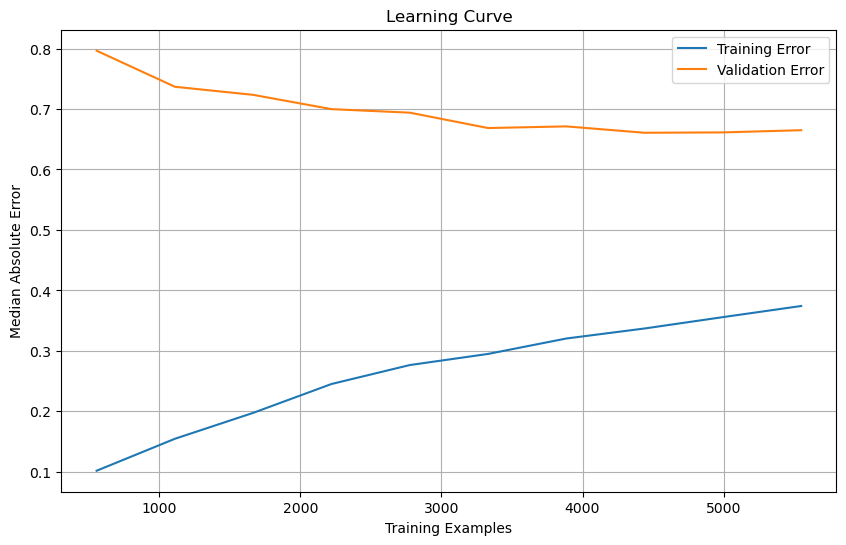

In [143]:
from sklearn.model_selection import learning_curve


# Plot learning curve
def plot_learning_curve(model, X_train, y_train, X_val, y_val):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X_train, y_train, cv=3, scoring='neg_median_absolute_error', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    validation_scores_mean = -np.mean(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Error')
    plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Median Absolute Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the learning curve
plot_learning_curve(xgb_reg_model, X_train_scaled, y_train1, X_val_scaled, y_val1)